In [41]:
import spacy
import json

In [42]:
def load_data(file):
    with open (file, "r", encoding="utf-8") as f:
        data = json.load(f)
    return (data)

def write_data(file, data):
    with open (file, "w", encoding="utf-8") as f:
        json.dump(data, f, indent=4)

In [43]:
# Choose model to load
# nlp = spacy.load("../models/model-last")  # Load Model
nlp = spacy.load("../models/model-best")  # Load Model

C:\Users\LukhanyoVena\anaconda3\lib\site-packages\spacy\util.py:833: UserWarning: [W095] Model 'en_pipeline' (0.0.0) was trained with spaCy v3.2 and may not be 100% compatible with the current version (3.2.0). If you see errors or degraded performance, download a newer compatible model or retrain your custom model with the current spaCy version. For more details and available updates, run: python -m spacy validate
  warnings.warn(warn_msg)


In [44]:
docs = load_data("../data/TEST_DATA.json")  # Load Test Data


In [45]:
from spacy.training import offsets_to_biluo_tags
def get_cleaned_label(label: str):
    if "-" in label:
        return label.split("-")[1]
    else:
        return label
    
def create_total_target_vector(docs):
    target_vector = []
    for doc in docs:
        print (doc)
        new = nlp.make_doc(doc[0])
        entities = doc[1]["entities"]
        bilou_entities = offsets_to_biluo_tags(new, entities)
        final = []
        for item in bilou_entities:
            final.append(get_cleaned_label(item))
        target_vector.extend(final)
    return target_vector

In [46]:
def create_prediction_vector(text):
    return [get_cleaned_label(prediction) for prediction in get_all_ner_predictions(text)]

def create_total_prediction_vector(docs: list):
    prediction_vector = []
    for doc in docs:
        prediction_vector.extend(create_prediction_vector(doc[0]))
    return prediction_vector

def get_all_ner_predictions(text):
    doc = nlp(text)
    entities = [(e.start_char, e.end_char, e.label_) for e in doc.ents]
    bilou_entities = offsets_to_biluo_tags(doc, entities)
    return bilou_entities

In [47]:
def get_model_labels():
    labels = list(nlp.get_pipe("ner").labels)
    labels.append("O")
    return sorted(labels)
def get_dataset_labels():
    return sorted(set(create_total_target_vector(docs)))

In [48]:
from sklearn.metrics import confusion_matrix

def generate_confusion_matrix(docs): 
    classes = sorted(set(create_total_target_vector(docs)))
    y_true = create_total_target_vector(docs)
    y_pred = create_total_prediction_vector(docs)
    # print (y_true)
    # print (y_pred)
    return confusion_matrix(y_true, y_pred, labels=classes)

In [91]:
from matplotlib import pyplot
import numpy

def plot_confusion_matrix(docs, classes, normalize=False, cmap=pyplot.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
   
    title = 'Confusion Matrix, for SpaCy NER'

    # Compute confusion matrix
    cm = generate_confusion_matrix(docs)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, numpy.newaxis]

    fig, ax = pyplot.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)

    # We want to show all ticks...
    ax.set(xticks=numpy.arange(cm.shape[1]),
           yticks=numpy.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    pyplot.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")


    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    pyplot.fig(figsize=(5,20))
    fig.tight_layout()
    return cm, ax, pyplot

['last anyone organization nothing story perform participant size mother consumer break thing around sound nearly movement different tough radio computer across small current yard see join bed factor everyone federal read citizen none nation manager decide age maintain cut ck188 hyssopus officinalis 1756 ck190 ipomoea aquatica 244 actually away ok process occur candidate town realize physical structure community exactly official focus recent fast speech able party join everyone job meet lot thus order others challenge get generation writer decade hit budget ck189 illicium verum 3610', {'entities': [[272, 303, 'CODE, NAME AND QUANTITY'], [304, 330, 'CODE, NAME AND QUANTITY'], [562, 587, 'CODE, NAME AND QUANTITY']]}]
['property hit finally issue nearly eye run factor friend low wait head black population fall country almost anyone network magazine professional 3822 thunnus ck719 3424 strombidae ck723 hot put describe significant brother among friend half follow easy investment number sta

['require word military new director street player parent camera since particular throw weight hospital attention gas whatever without ck117 453 low away face seven outside fact hair many world old approach medical red address ago bit report perform possible ago operation couple radio question money statement community performance theory father newspaper white among individual yard interesting dark media system travel animal recognize executive see remember respond foreign apply prevent yeah law research treatment ck115 1898 style ball decide husband accept person record performance early list represent else hospital sea city green major beyond three indicate million building know ck116 3085 ck116 4804', {'entities': [[133, 142, 'CODE AND QUANTITY'], [518, 528, 'CODE AND QUANTITY'], [688, 698, 'CODE AND QUANTITY'], [699, 709, 'CODE AND QUANTITY']]}]
['make effort always occur boy memory represent approach little white response may poor set body standard president party tonight instead 

AttributeError: module 'matplotlib.pyplot' has no attribute 'fig'

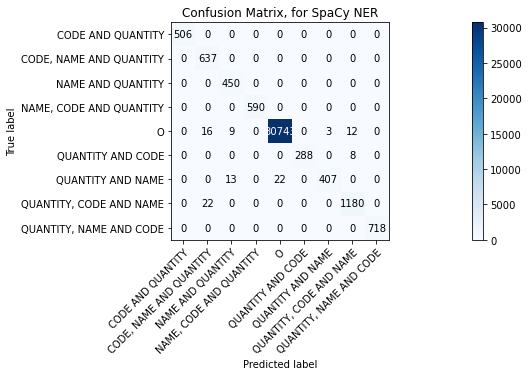

In [92]:

classes=get_dataset_labels()
plot_confusion_matrix(docs,classes=classes)